<a href="https://colab.research.google.com/github/MRAMIRE/Tesis_Modelo_Deep_Learning_USA/blob/master/3_Pre_PorcesamientoV2_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRE-PROCESAMIENTO DE DATA (SEPARACIÓN DE TRAIN Y TEST):**

###FELIPE ANTONIO MELO CIFUENTES

###MARIA CAMILA RAMIREZ FERRO


#####Importar librerias:

In [0]:
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

##### Permisos y cambio de directorio:

In [0]:
# Permisos
drive.mount('/gdrive')

# Cambio de Directorio
%cd /gdrive/My\ Drive/Tesis

# Contenido del Directorio actual
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/Tesis
'1. Exploración de los Datos'                            runs/
'2. Visualización de la Data.ipynb'                      sample_submission.csv
'3. Pre-PorcesamientoV2-Data.Pre-PorcesamientoV2-Data'   set_test.csv
'4. Data Set.ipynb'                                      set_train.csv
'5. Entrenamiento'                                       test_images/
 checkpoints/                                            train.csv
 Clon                     

##### Lectura del archivo csv train:

In [0]:
# Creación de la variable df_train
df_train = pd.read_csv('train.csv')

# Muesta los primeros registros de df_train
print('La cantidad de registros en el documento son :',df_train.shape[0])
df_train.head()

La cantidad de registros en el documento son : 22184


,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


##### Creación de un nuevo df_train

In [0]:
# Separar columna "Image_Label"
df_split = df_train["Image_Label"].str.split("_", n = 1, expand = True)

# Agregar nuevas columnas (Image,Label) a df_train
df_train['Image'] = df_split[0]
df_train['Label'] = df_split[1]

df_train.head()

,Image_Label,EncodedPixels,Image,Label
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,Fish
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,Flower
2,0011165.jpg_Gravel,NaN,0011165.jpg,Gravel
3,0011165.jpg_Sugar,NaN,0011165.jpg,Sugar
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,Fish


In [0]:
# Creación de columnas por cada label
df_trainfxd = pd.get_dummies(df_train, columns = ['Label'])

# Llenado de los datos nulos
df_trainfxd = df_trainfxd.fillna('-1')

# Definición de función para llenado de registros dummies
def fill_dummies(row, label):
    if label == 'fish':
        return row['Label_Fish'] * (row['EncodedPixels'])
    if label == 'flower':
        return row['Label_Flower'] * (row['EncodedPixels'])
    if label == 'gravel':
        return row['Label_Gravel'] * (row['EncodedPixels'])
    if label == 'sugar':
        return row['Label_Sugar'] * (row['EncodedPixels'])
    
# Ejecución de función "fill_dummies" para el llenado de registros 
df_trainfxd['Label_Fish'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'fish'), axis=1)
df_trainfxd['Label_Flower'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'flower'), axis=1)
df_trainfxd['Label_Gravel'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'gravel'), axis=1)
df_trainfxd['Label_Sugar'] = df_trainfxd.apply(lambda row: fill_dummies(row, 'sugar'), axis=1)
orginal_shape = df_trainfxd.shape

print("Tomado de: https://www.kaggle.com/aleksandradeis/understanding-clouds-eda")
print("")
df_trainfxd.head()

Tomado de: https://www.kaggle.com/aleksandradeis/understanding-clouds-eda



,Image_Label,EncodedPixels,Image,Label_Fish,Label_Flower,Label_Gravel,Label_Sugar
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...,0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,,,
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...,0011165.jpg,,1355565 1002 1356965 1002 1358365 1002 1359765...,,
2,0011165.jpg_Gravel,-1,0011165.jpg,,,-1,
3,0011165.jpg_Sugar,-1,0011165.jpg,,,,-1
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...,002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,,,


In [0]:
# Creación de nueva matriz de columna "Image" contra los labels dentro de ella
df_trainfxd = df_trainfxd.groupby('Image')['Label_Fish', 'Label_Flower', 'Label_Gravel', 'Label_Sugar'].max()
print(df_trainfxd.shape)
df_trainfxd.head()

(5546, 4)


,Label_Fish,Label_Flower,Label_Gravel,Label_Sugar
Image,,,,
0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1355565 1002 1356965 1002 1358365 1002 1359765...,-1,-1
002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1339279 519 1340679 519 1342079 519 1343479 51...,-1,67495 350 68895 350 70295 350 71695 350 73095 ...
0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,2047 703 3447 703 4847 703 6247 703 7647 703 9...,-1,658170 388 659570 388 660970 388 662370 388 66...
0035239.jpg,-1,100812 462 102212 462 103612 462 105012 462 10...,65400 380 66800 380 68200 380 69600 380 71000 ...,-1
003994e.jpg,2367966 18 2367985 2 2367993 8 2368002 62 2369...,-1,353317 416 354717 416 356117 416 357517 416 35...,28011 489 29411 489 30811 489 32211 489 33611 ...


##### División del set completo de datos df_train en train y test

In [0]:
train, test = train_test_split(df_trainfxd,random_state = 6)
print("El número de registros agrupados por imagenes dentro del set de datos es de ",df_trainfxd.shape[0],"imagenes.")
print("Al dividir df_train en train y test las dimensiones de estos son las siguientes:")
print("La cantidad de registros para train es de: ",train.shape[0],"imagenes o un ",round((train.shape[0]/df_trainfxd.shape[0])*100,2),'% del total.')
print("La cantidad de registros para test es de: ",test.shape[0],"imagenes o un ",round((test.shape[0]/df_trainfxd.shape[0])*100,2),'%  del total.')

El número de registros agrupados por imagenes dentro del set de datos es de  5546 imagenes.
Al dividir df_train en train y test las dimensiones de estos son las siguientes:
La cantidad de registros para train es de:  4159 imagenes o un  74.99 % del total.
La cantidad de registros para test es de:  1387 imagenes o un  25.01 %  del total.


##### Análisis de la distribución de labels dentro de los dos nuevos conjuntos creados (train,test)

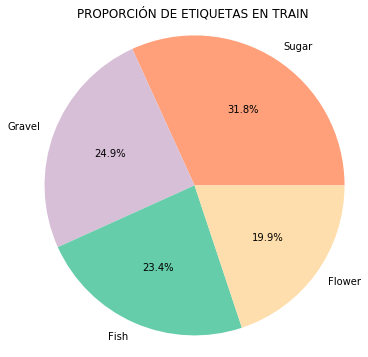

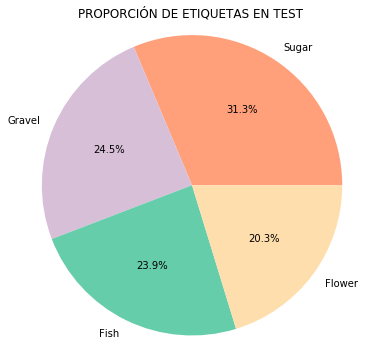

In [0]:
# Conteo por label contra los valores validos de EncodedPixel para el set de datos en Train

fish = 0
flower = 0
gravel = 0
sugar = 0
for i in train['Label_Fish']:
  if len(i) >= 3:
    fish += 1
for i in train['Label_Flower']:
  if len(i) >= 3:
    flower += 1
for i in train['Label_Gravel']:
  if len(i) >= 3:
    gravel += 1
for i in train['Label_Sugar']:
  if len(i) >= 3:
    sugar += 1

labels = 'Sugar', 'Gravel', 'Fish', 'Flower'
sizes = [sugar, gravel, fish, flower]

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#FFA07A','#D8BFD8','#66CDAA','#FFDEAD']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
ax.axis('equal')
ax.set_title('PROPORCIÓN DE ETIQUETAS EN TRAIN')
plt.show()

# Conteo por label contra los valores validos de EncodedPixel para el set de datos en Test

fish = 0
flower = 0
gravel = 0
sugar = 0
for i in test['Label_Fish']:
  if len(i) >= 3:
    fish += 1
for i in test['Label_Flower']:
  if len(i) >= 3:
    flower += 1
for i in test['Label_Gravel']:
  if len(i) >= 3:
    gravel += 1
for i in test['Label_Sugar']:
  if len(i) >= 3:
    sugar += 1

labels = 'Sugar', 'Gravel', 'Fish', 'Flower'
sizes = [sugar, gravel, fish, flower]

fig, ax = plt.subplots(figsize=(6, 6))
colores= ['#FFA07A','#D8BFD8','#66CDAA','#FFDEAD']
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colores)
ax.axis('equal')
ax.set_title('PROPORCIÓN DE ETIQUETAS EN TEST')
plt.show()


##### Proporción de nulos para set de datos Train y Test

In [0]:
# Conteo de nulos para el set de datos Train

null = 0
for i in train['Label_Fish']:
  if i == '-1':
    null += 1
for i in train['Label_Flower']:
  if i == '-1':
    null += 1
for i in train['Label_Gravel']:
  if i == '-1':
    null += 1
for i in train['Label_Sugar']:
  if i == '-1':
    null += 1

print("Cantidad de registros dentro de train: ",train.shape[0]*4)
print("Registros validos en la columna EncodedPixels train: ",train.shape[0]*4-null)
print("Registros nulos en la columna EncodedPixels train: ",null)
print("")


Cantidad de registros dentro de train:  16636
Registros validos en la columna EncodedPixels train:  8875
Registros nulos en la columna EncodedPixels train:  7761



In [0]:
# Conteo de nulos para el set de datos Test

null = 0
for i in test['Label_Fish']:
  if i == '-1':
    null += 1
for i in test['Label_Flower']:
  if i == '-1':
    null += 1
for i in test['Label_Gravel']:
  if i == '-1':
    null += 1
for i in test['Label_Sugar']:
  if i == '-1':
    null += 1

print("Cantidad de registros dentro de train: ",test.shape[0]*4)
print("Registros validos en la columna EncodedPixels train: ",test.shape[0]*4-null)
print("Registros nulos en la columna EncodedPixels train: ",null)
print("")

Cantidad de registros dentro de train:  5548
Registros validos en la columna EncodedPixels train:  2961
Registros nulos en la columna EncodedPixels train:  2587



##### Exportar a CSV set de datos

In [0]:
# Exporte de datos en csv para train

# Nombre del csv de salida de train 
output_name = "set_train.csv"

train.to_csv(output_name, sep=',', index=True, header=True)
!cp $output_name /Tesis

In [0]:
# Exporte de datos en csv para test

# Nombre del csv de salida de test
output_name = "set_test.csv"

test.to_csv(output_name, sep=',', index=True, header=True)
!cp $output_name /Tesis